# Column Generation


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from exputils.extent.cg import calculate_extent_CG
from exputils.state.random_ket import make_random_quantum_state

In [3]:
sns.set_theme("paper")
rc = {"mathtext.fontset": "stix"}
plt.rcParams.update(rc)


def visualize_result(n_qubit, extends, max_values):
    fig = plt.figure(figsize=(6.5, 5))
    ax1 = plt.subplot(1, 2, 1)
    ax2 = plt.subplot(1, 2, 2)
    # plot extends to ax1 with seaborn
    sns.lineplot(x=list(range(1, len(extends) + 1)), y=extends, ax=ax1, marker="o")
    ax1.set_xlabel("Iteration", fontsize=25)
    ax1.set_ylabel("Objective Value", fontsize=25)
    ax1.set_xticks(list(range(1, len(extends) + 1)))
    sns.lineplot(
        x=list(range(1, len(max_values) + 1)), y=max_values, ax=ax2, marker="o"
    )
    ax2.set_xlabel("Iteration", fontsize=25)
    ax2.set_ylabel("Max Violation", fontsize=25)
    ax2.set_xticks(list(range(1, len(max_values) + 1)))
    # fig.suptitle("(a)" if n_qubit == 7 else "(b)", fontsize=25, y=0.85, x=0.05)
    plt.tight_layout()
    plt.savefig(f"../image/CG_{n_qubit}.pdf", bbox_inches="tight")
    plt.show()

n=7
CG: n=7, method='mosek'
start: calculate dots
[k|progress|range]: 1 | 3.26400e+04/8.12849e+10 | [0.09567, 0.30373] | 6[ms]
[k|progress|range]: 2 | 2.76365e+06/8.12849e+10 | [0.21003, 0.34968] | 155[ms]
[k|progress|range]: 3 | 9.95194e+07/8.12849e+10 | [0.26630, 0.37190] | 549[ms]
[k|progress|range]: 4 | 1.64761e+09/8.12849e+10 | [0.30183, 0.41110] | 1311[ms]
[k|progress|range]: 5 | 1.28338e+10/8.12849e+10 | [0.32515, 0.41110] | 3063[ms]
[k|progress|range]: 6 | 4.69251e+10/8.12849e+10 | [0.33910, 0.41908] | 5953[ms]
[k|progress|range]: 7 | 8.12849e+10/8.12849e+10 | [0.34461, 0.41908] | 8327[ms]
 calculation time : 8327[ms]
branch cut / total: 80838103040/81284860800
iteration: 1 / 100, Amat.shape = (128, 10000)
start: solve SOCP
stabilizer_extent=7.430282225289089
start: calculate dual dots
[k|progress|range]: 1 | 3.26400e+04/8.12849e+10 | [nan, nan] | 2[ms]
[k|progress|range]: 2 | 2.76365e+06/8.12849e+10 | [nan, nan] | 23[ms]
[k|progress|range]: 3 | 9.95194e+07/8.12849e+10 | [1.003

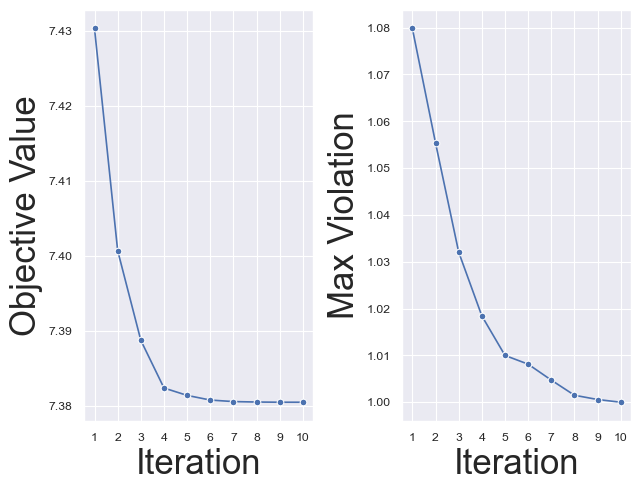

In [4]:
import time

seed = 0
n = 7
print(f"{n=}")
np.random.seed(seed)
psi = make_random_quantum_state("pure", n, seed)
t0 = time.perf_counter()
stabilizer_extent, extends, max_values = calculate_extent_CG(n, psi)
t1 = time.perf_counter()
print(f"{stabilizer_extent=} {t1-t0=}")
visualize_result(n, extends, max_values)